In [1]:
names = ['United States', 'Australia', 'Japan', 'India', 'Russia', 'Morocco', 'Egypt']
dr =  [True, False, False, False, True, True, True]
cpc = [809, 731, 588, 18, 200, 70, 45]

In [2]:
import pandas as pd

In [3]:
my_dict = {
     'country': names,
    'drives_right': dr,
    'cars_per_cap':cpc
}

In [4]:
my_dict

{'country': ['United States',
  'Australia',
  'Japan',
  'India',
  'Russia',
  'Morocco',
  'Egypt'],
 'drives_right': [True, False, False, False, True, True, True],
 'cars_per_cap': [809, 731, 588, 18, 200, 70, 45]}

In [5]:
cars = pd.DataFrame(my_dict)
print(cars)

         country  drives_right  cars_per_cap
0  United States          True           809
1      Australia         False           731
2          Japan         False           588
3          India         False            18
4         Russia          True           200
5        Morocco          True            70
6          Egypt          True            45


In [6]:
row_labels = ['US', 'AUS', 'JPN', 'IN', 'RU', 'MOR', 'EG']

# Specify row labels of cars
cars.index = row_labels

# Print cars again
print(cars)

           country  drives_right  cars_per_cap
US   United States          True           809
AUS      Australia         False           731
JPN          Japan         False           588
IN           India         False            18
RU          Russia          True           200
MOR        Morocco          True            70
EG           Egypt          True            45


In [7]:
print(cars['country']) # as a series, single square brackets

US     United States
AUS        Australia
JPN            Japan
IN             India
RU            Russia
MOR          Morocco
EG             Egypt
Name: country, dtype: object


In [8]:
print(cars[['country']]) #as a dataframe, double squarebrackets

           country
US   United States
AUS      Australia
JPN          Japan
IN           India
RU          Russia
MOR        Morocco
EG           Egypt


In [9]:
print(cars[['country', 'drives_right']])

           country  drives_right
US   United States          True
AUS      Australia         False
JPN          Japan         False
IN           India         False
RU          Russia          True
MOR        Morocco          True
EG           Egypt          True


In [10]:
print(cars[0:3])

# Print out fourth, fifth and sixth observation
print(cars[3:6])

           country  drives_right  cars_per_cap
US   United States          True           809
AUS      Australia         False           731
JPN          Japan         False           588
     country  drives_right  cars_per_cap
IN     India         False            18
RU    Russia          True           200
MOR  Morocco          True            70


In [11]:
cars.loc['RU']
cars.iloc[4]


country         Russia
drives_right      True
cars_per_cap       200
Name: RU, dtype: object

In [12]:
cars.loc[['RU', 'AUS']]

,country,drives_right,cars_per_cap
RU,Russia,True,200
AUS,Australia,False,731


In [13]:
cars.iloc[[4, 1]]

,country,drives_right,cars_per_cap
RU,Russia,True,200
AUS,Australia,False,731


In [14]:
print(cars.loc[['MOR'],'drives_right'])
print('-------------------------')
# Print sub-DataFrame
print(cars.iloc[[4, 5], [1, 2]])

MOR    True
Name: drives_right, dtype: bool
-------------------------
     drives_right  cars_per_cap
RU           True           200
MOR          True            70


In [15]:
# Extract drives_right column as Series: dr
dr =  cars['drives_right']

# Use dr to subset cars: sel
sel = cars[dr]

# Print sel
print(sel)
# print all the obervations where drives_rigth is true

           country  drives_right  cars_per_cap
US   United States          True           809
RU          Russia          True           200
MOR        Morocco          True            70
EG           Egypt          True            45


In [16]:
# Convert code to a one-liner
sel = cars[cars['drives_right']]

# Print sel
print(sel)

           country  drives_right  cars_per_cap
US   United States          True           809
RU          Russia          True           200
MOR        Morocco          True            70
EG           Egypt          True            45


In [17]:
# Create car_maniac: observations that have a cars_per_cap over 500
cpc = cars['cars_per_cap']
car_maniac = cars[cpc > 500]
many_cars = cpc <= 500


# Print car_maniac
print(car_maniac)

           country  drives_right  cars_per_cap
US   United States          True           809
AUS      Australia         False           731
JPN          Japan         False           588


In [18]:
import numpy as np

# Create medium: observations with cars_per_cap between 100 and 500
cpc = cars['cars_per_cap']
between = np.logical_and(cpc >= 100, cpc <= 500)
medium = cars[between]


# Print medium
print(medium)

   country  drives_right  cars_per_cap
RU  Russia          True           200


In [44]:
for lab, row in cars.iterrows() :
    print(lab + ": " + str(row['cars_per_cap']))

US: 809
AUS: 731
JPN: 588
IN: 18
RU: 200
MOR: 70
EG: 45


 ## looping: the Pandas DataFrame

In [20]:
brics = pd.read_csv("brics.csv", index_col= 0)

In [21]:
for val in brics: #just printed the column names, it doesn't work to handle the data
    print(val)

country
capital
area
population


In [24]:
for labels, rows in brics.iterrows():
    print(labels)
    print(rows)

BR
country         Brazil
capital       Brasilia
area             8.516
population       200.4
Name: BR, dtype: object
RU
country       Russia
capital       Moscow
area            17.1
population     143.5
Name: RU, dtype: object
IN
country           India
capital       New Delhi
area              3.286
population         1252
Name: IN, dtype: object
CH
country         China
capital       Beijing
area            9.597
population       1357
Name: CH, dtype: object
SA
country       South Africa
capital           Pretoria
area                 1.221
population           52.98
Name: SA, dtype: object


In [34]:
# selective print, e.g print the capital
for lab, row in brics.iterrows():
    print("{}: {} and its area is {} sqm".format(lab, row['capital'], row['area']))

BR: Brasilia and its area is 8.516 sqm
RU: Moscow and its area is 17.1 sqm
IN: New Delhi and its area is 3.286 sqm
CH: Beijing and its area is 9.597000000000001 sqm
SA: Pretoria and its area is 1.2209999999999999 sqm


In [41]:
# add a new column
for lab, row in brics.iterrows():
    brics.loc[lab, 'name_lenght'] = len(row['country'])
print(brics)

         country    capital    area  population  name_lenght
BR        Brazil   Brasilia   8.516      200.40          6.0
RU        Russia     Moscow  17.100      143.50          6.0
IN         India  New Delhi   3.286     1252.00          5.0
CH         China    Beijing   9.597     1357.00          5.0
SA  South Africa   Pretoria   1.221       52.98         12.0


In [43]:
# using a function without for loop
brics['name_lenght'] = brics['country'].apply(len)
print(brics)

         country    capital    area  population  name_lenght
BR        Brazil   Brasilia   8.516      200.40            6
RU        Russia     Moscow  17.100      143.50            6
IN         India  New Delhi   3.286     1252.00            5
CH         China    Beijing   9.597     1357.00            5
SA  South Africa   Pretoria   1.221       52.98           12


In [45]:
for lab, row in cars.iterrows():
    cars.loc[lab, 'COUNTRY'] = row['country'].upper()

In [46]:
print(cars)

           country  drives_right  cars_per_cap        COUNTRY
US   United States          True           809  UNITED STATES
AUS      Australia         False           731      AUSTRALIA
JPN          Japan         False           588          JAPAN
IN           India         False            18          INDIA
RU          Russia          True           200         RUSSIA
MOR        Morocco          True            70        MOROCCO
EG           Egypt          True            45          EGYPT


In [47]:
# Use .apply(str.upper)
cars["COUNTRY"] = cars["country"].apply(str.upper)
print(cars)

           country  drives_right  cars_per_cap        COUNTRY
US   United States          True           809  UNITED STATES
AUS      Australia         False           731      AUSTRALIA
JPN          Japan         False           588          JAPAN
IN           India         False            18          INDIA
RU          Russia          True           200         RUSSIA
MOR        Morocco          True            70        MOROCCO
EG           Egypt          True            45          EGYPT


## coin toss

In [57]:
import numpy as np
np.random.seed(123)
coin = np.random.randint(0,2) # generate 0 or 1(integers)

In [58]:
if coin == 0:
    print("head")
else:
    print("tails")

head


In [59]:
# Import numpy and set seed
import numpy as np
np.random.seed(123)

# Use randint() to simulate a dice
print(np.random.randint(1,7))

# Use randint() again
print(np.random.randint(1,7))

6
3


In [64]:
# Roll the dice
dice = np.random.randint(1,7)
step = 50
# Finish the control construct
if dice <= 2: # if dice is one or 2, go back one step
    step = step - 1
elif dice <= 5: # if dice is 3,4 or 5 , go forward one step
    step = step + 1
else: # else, roll dice again
    step = step + np.random.randint(1,7)

# Print out dice and step
print(dice, step)

3 51


In [85]:
import numpy as np
np.random.seed(123)
outcomes = []
for i in range(10):
    coin = np.random.randint(0,2) # generate 0 or 1(integers)
    if coin == 0:
        outcomes.append("heads")
    else:
        outcomes.append("tails")

In [86]:
print(outcomes)

['heads', 'tails', 'heads', 'heads', 'heads', 'heads', 'heads', 'tails', 'tails', 'heads']


In [91]:
import numpy as np
np.random.seed(123)
tails = [0]
for i in range(10):
    coin = np.random.randint(0,2)
    tails.append(tails[i] + coin)
print(tails)    


[0, 0, 1, 1, 1, 1, 1, 1, 2, 3, 3]


In [80]:
# Numpy is imported, seed is set
np.random.seed(123)# Initialize random_walk
random_walk = [0]
# Complete the ___
for x in range(100) :
    # Set step: last element in random_walk
    step = random_walk[-1]

    # Roll the dice
    dice = np.random.randint(1,7)

    # Determine next step
    if dice <= 2:
        step = step = max(0, step - 1)
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)

    # append next_step to random_walk
    random_walk.append(step)

# Print random_walk
print(random_walk)

[0, 3, 4, 5, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1, 0, 0, 1, 6, 5, 4, 5, 4, 5, 6, 7, 8, 9, 8, 9, 8, 9, 10, 11, 12, 11, 15, 16, 15, 16, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 33, 34, 38, 39, 38, 39, 40, 39, 40, 41, 43, 44, 45, 44, 43, 44, 45, 44, 43, 44, 45, 47, 46, 45, 46, 45, 46, 47, 48, 50, 49, 50, 51, 52, 53, 54, 53, 52, 53, 52, 53, 54, 53, 56, 57, 58, 59, 58, 59, 60]


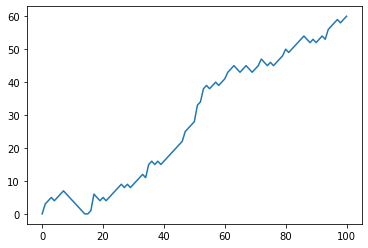

In [74]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Plot random_walk
plt.plot(random_walk)

# Show the plot
plt.show()

In [92]:
# Numpy is imported; seed is set

# Initialize all_walks (don't change this line)
all_walks = []

# Simulate random walk 10 times
for i in range(10) :

    # Code from before
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)

        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        random_walk.append(step)

    # Append random_walk to all_walks
    all_walks.append(random_walk)

# Print all_walk
print(all_walks)

[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 6, 5, 4, 5, 4, 5, 6, 7, 8, 9, 8, 9, 8, 9, 10, 11, 12, 11, 15, 16, 15, 16, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 33, 34, 38, 39, 38, 39, 40, 39, 40, 41, 43, 44, 45, 44, 43, 44, 45, 44, 43, 44, 45, 47, 46, 45, 46, 45, 46, 47, 48, 50, 49, 50, 51, 52, 53, 54, 53, 52, 53, 52, 53, 54, 53, 56, 57, 58, 59, 58, 59, 60, 64, 63, 62, 64, 63, 64], [0, 2, 3, 4, 9, 8, 9, 10, 11, 12, 13, 12, 17, 18, 19, 20, 19, 18, 17, 16, 15, 16, 17, 18, 24, 23, 22, 21, 22, 23, 24, 23, 24, 25, 24, 29, 30, 29, 28, 27, 26, 27, 26, 25, 27, 28, 31, 32, 34, 35, 36, 37, 36, 35, 36, 37, 38, 39, 38, 39, 40, 41, 44, 45, 46, 45, 46, 45, 46, 47, 48, 52, 51, 50, 51, 52, 53, 52, 53, 52, 53, 55, 60, 59, 60, 61, 62, 63, 64, 65, 64, 65, 66, 67, 69, 71, 70, 71, 72, 75, 74], [0, 1, 0, 1, 2, 3, 2, 3, 2, 3, 4, 6, 5, 4, 5, 6, 5, 7, 8, 9, 10, 11, 12, 13, 12, 13, 14, 19, 20, 19, 18, 17, 16, 17, 18, 19, 24, 25, 24, 25, 26, 27, 28, 29, 30, 29, 28, 29, 28, 34, 33, 34, 33, 34, 33, 34, 38, 42, 44, 46

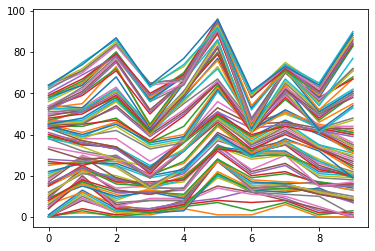

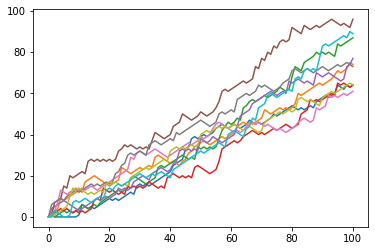

In [93]:
# Convert all_walks to Numpy array: np_aw
np_aw = np.array(all_walks)

# Plot np_aw and show
plt.plot(np_aw)
plt.show()

# Clear the figure
plt.clf()

# Transpose np_aw: np_aw_t
np_aw_t = np.transpose(np_aw)

# Plot np_aw_t and show
plt.plot(np_aw_t)
plt.show()


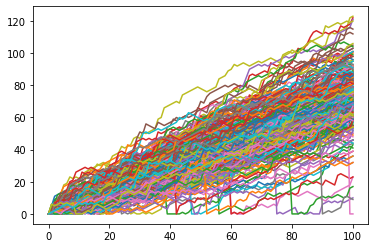

In [94]:
# numpy and matplotlib imported, seed set

# Simulate random walk 250 times
all_walks = []
for i in range(250) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)

        # Implement clumsiness
        if np.random.rand() <= 0.001 :
            step = 0

        random_walk.append(step)
    all_walks.append(random_walk)

# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))
plt.plot(np_aw_t)
plt.show()

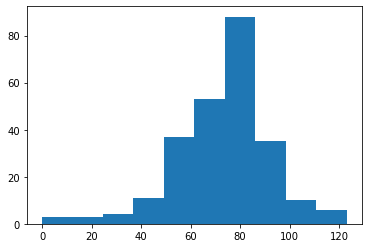

In [96]:

# Select last row from np_aw_t: ends
ends = np_aw_t[-1,:]

# Plot histogram of ends, display plot
plt.hist(ends)
plt.show()

In [97]:
ends


array([ 82,  50,  95, 101,  62,  82,  62,  58,  96,  58,  71,  72,  75,
        71,  61,  46,  23,  68,  54,  69,  71,  73,  92,  77,  54,  86,
        50,  76,  83,  52,  74,  75,  62,  74,  87,  82,  59,  55,  84,
        58,  71,  74,  57,  75,  10,  75,  84,  88,  75,  95,  53,  49,
        43,  59,  52,  92,  79,  77,  69,  72,  76,  75,  66, 101,  75,
        55,  87,  78, 123,  57,  68,  74,  67,  60,  75, 105,  77,  92,
        83,  62,  86,  63,  56, 122,  69,  85,  67,  91,  66,  68,  73,
       100,  59,  78,  74,  81,  74,  44,  77,  77,  84,  89,  46,  23,
        59,  74,   0,  67,  92,  73,  83,  78,  99,  75, 103,  55,  66,
        93,  77,  88,  74,  86,  64,  87, 121,  76,  78,  70,  75, 101,
        88,  54,  73,  98,  85,  64,  72,  85,  81,  68,  87,  88,  59,
        74,  74,  60,  71,  81,  54,  87,  96,  71,  71,  63,  83,  82,
        82,  78,  54,  44,  82,  92,  89,  69,  78, 115,  48,  76,  70,
        65,  79,  82,  61,  91,  53,  87,  91,  72,  76,  75,  3

In [102]:
count= 0
prob = len(ends)
print(prob)
for i in ends:
    if i > 60:
        count = count + 1
print(count)
prob = count / prob
print(prob)

250
197
0.788
